<a href="https://colab.research.google.com/github/rishikadeshmukh/linearRegression/blob/main/my_linearreg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [8]:
! git clone https://github.com/DS3001/linearRegression


fatal: destination path 'linearRegression' already exists and is not an empty directory.


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64 

Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64 



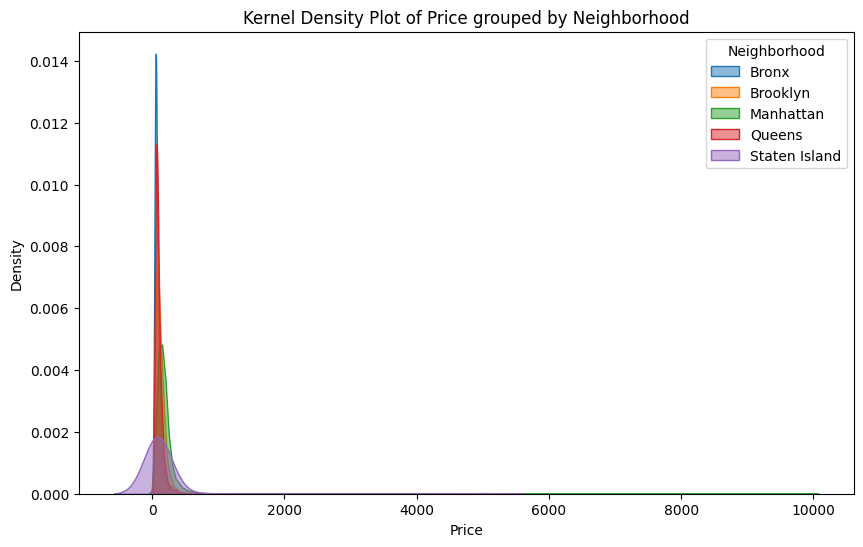

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
#print(df.head(), '\n')
neighbourhood = df['Neighbourhood ']

#print(neighbourhood.value_counts(), '\n')

average_price_by_neighborhood = df.groupby(neighbourhood)['Price'].mean()
average_scores_by_neighborhood = df.groupby(neighbourhood)['Review Scores Rating'].mean()
print(average_price_by_neighborhood, '\n')
print(average_scores_by_neighborhood, '\n')

# kernel density plot for price grouped by the variable
plt.figure(figsize=(10, 6))
for category, data in df.groupby(neighbourhood):
    sns.kdeplot(data['Price'], label=str(category), fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Price grouped by Neighborhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Neighborhood')
plt.show()


In [7]:
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = LabelBinarizer()
oh = one_hot_encoder.fit_transform(neighbourhood) # One-hot encode the 'neighborhood' variable
print(oh)
names = one_hot_encoder.classes_ # Get names of the classes
#print(names)

model = LinearRegression(fit_intercept=False)
model.fit(oh, df['Price'])
print("Coefficients:", model.coef_)
print(neighbourhood.value_counts(), '\n')

# Target Variable
y = df['Price']

# Brand Dummy:
X_d = pd.get_dummies(neighbourhood,drop_first=True) # Create brand dummies

reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, y)) # R squared measure

[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ...
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]
Coefficients: [ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]
Neighbourhood 
Manhattan        11763
Brooklyn          8487
Queens            1590
Bronx              217
Staten Island       96
Name: count, dtype: int64 

R-squared:  0.04380832397270662


Manhattan is the most expensive bourough on average with a average amount of 183.7 dollars a night

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Numeric Model - R2 Score: 0.9088614307593672
Numeric Model - RMSE: 102240.80487357063
Categorical RMSE: 172034.88045854194
Categorical R^2: 0.741960193834547
RMSE Combined: 85081.52907006339
R^2 Combined: 0.9476636278991107
RMSE: 33863.06703488754
R^2: 0.9917094064826192


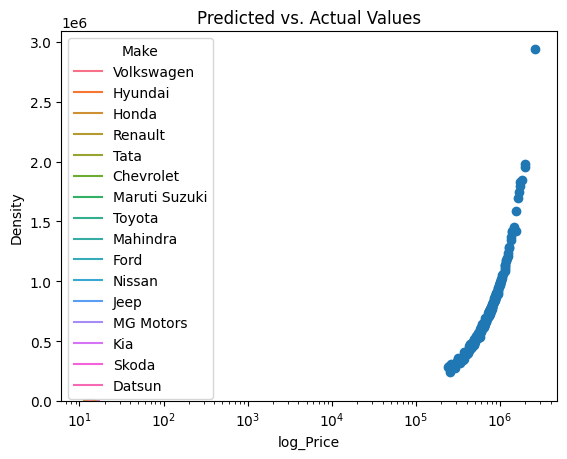

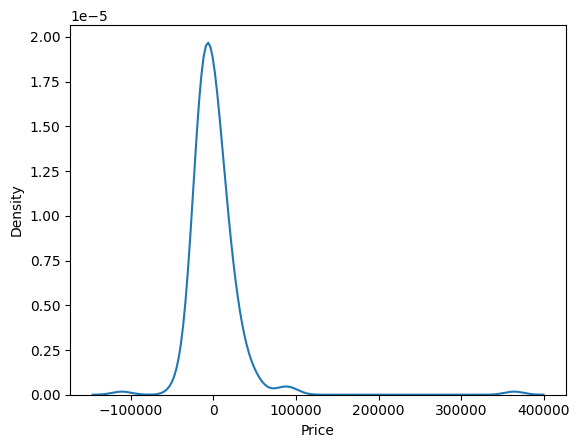

RMSE on Test Set: 61165.40060831747
R^2 on Test Set: 0.9729514062681907


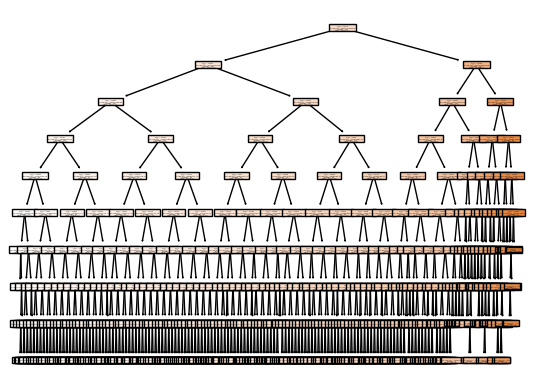

In [11]:
from scipy.stats import zscore
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

#Q1
df = pd.read_csv('/content/linearRegression/data/cars_hw.csv',low_memory=False)
df.head()
df.describe()

nan_val= df.isna().sum()
infinite_val = df.replace([np.inf, -np.inf], np.nan).isna().sum()
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean['log_Price'] = np.log(df_clean['Price']) #transform

#Q2
df_clean['log_Price'].describe()
#The price variable has 976 values and a mean of 13.411 and a S.D. of 0.450276
#The new scaled variable has a 25th percentile of 13.072647, 75th percentile of 13.691080, and 50th percentile of 13.409795
sns.kdeplot(df_clean['log_Price'])
df_clean.groupby('Make')['log_Price'].describe()
sns.kdeplot(data=df_clean, x='log_Price', hue='Make',log_scale=True)
#looks like the most expensive car brands are MG Motors and Jeep
#The price have a larger density towards the middle between 1.3*10^1 and 1.4*10^1, brands like Honda and Maruti Suzuki have a high concentrations of prices in a smaller range of price

#Q3
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_clean, test_size=.2,random_state=100)

#Q4

from sklearn.metrics import mean_squared_error, r2_score
y = df_clean['Price']
X = df_clean.drop(columns=['Price'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# first model: regression on numeric variables alone
numeric_cols = X.select_dtypes(include=np.number).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]
model_numeric = LinearRegression()
model_numeric.fit(X_train_numeric, y_train)
y_pred_numeric = model_numeric.predict(X_test_numeric)
r2_numeric = r2_score(y_test, y_pred_numeric) #chatgpt
rmse_numeric = np.sqrt(mean_squared_error(y_test, y_pred_numeric))#chatgpt

print("Numeric Model - R2 Score:", r2_numeric)#R^2 = 0.9088614307593672
print("Numeric Model - RMSE:", rmse_numeric)# RMSE: 102240.80487357063

#second model categorical variable

y = df_clean['Price']
#chatgpt
categorical_features = df_clean.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='drop'
)

X = preprocessor.fit_transform(df_clean)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regCat = LinearRegression().fit(X, y)
y_hat_lm = regCat.predict(X_test)
R2_cat = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_cat = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("Categorical RMSE:", RMSE_cat)#RMSE: 172034.88045854194
print("Categorical R^2:", R2_cat)#R^2: 0.741960193834547

#third model
full_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
X = full_preprocessor.fit_transform(df_clean)
#chatgpt ends
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
regComb = LinearRegression().fit(X, y) # Fit the linear model
y_hat_lm = regComb.predict(X_test)
R2_comb = r2_score(y_test, y_hat_lm) #from chatgpt
RMSE_comb = mean_squared_error(y_test, y_hat_lm, squared=False) #from chatgpt
print("RMSE Combined:", RMSE_comb) #85081.52907006339
print("R^2 Combined:", R2_comb)#0.9476636278991107
#joint model performs better since the r^2 value is closer to 1

#Q5
from sklearn.preprocessing import PolynomialFeatures
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
categorical_transformer = OneHotEncoder()

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', expander, numeric_cols),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#chatgpt
X = df_clean[numeric_cols.tolist() + categorical_features.tolist()]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train_lm = preprocessor.fit_transform(X_train)
X_test_lm = preprocessor.transform(X_test)

reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
#print(reg.score(X_test_lm, y_test)) # R squared measure

# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

R2_lm = r2_score(y_test, y_hat_lm) #chatgpt
RMSE_lm = mean_squared_error(y_test, y_hat_lm, squared=False) #chatgpt
print("RMSE:", RMSE_lm)
print("R^2:", R2_lm)
#As degree increases, RMSE and R^2 decreases

#Q6
## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show() #they line up kind of
residuals_lm = y_test - y_hat_lm
sns.kdeplot(residuals_lm)
plt.show() #residuals look roughly bell-shaped around zero

#Strengths: high R^2 value, low RMSE value, residual's distribution around 0
#Weaknesses: skewed tail indicates outliers,




**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?
7. Show that if you regress a variable $y$ on a one-hot encoded variable and no intercept, the regression coefficients are the group averages.

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?